<a href="https://colab.research.google.com/github/gluoneros/talentoTech/blob/main/Copia_de_NuevoproyectoGrupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importaciones y librerias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# check modelos
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
# check escaladores
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# **Carga Datos**

In [ ]:
!pip install sodapy

In [ ]:
from sodapy import Socrata
client = Socrata("www.datos.gov.co", None)

## Datos df1

In [ ]:
results1 = client.get("3ebi-d83g", limit=5000)

In [ ]:
## Predecir basados en 	'energia_activa',	'energia_reactiva', 'potencia_maxima'
#'prom_diario_horas' cual sería el día de demanda maxima para que una localidad en una zona no interconectada limitara y optimizara su uso de energía en funcion del posible ahorro de esta.Y los habitantes en sus viviendas emplearan con anticipacion dichas disminusiones en el consumo enrgetico gracias al día de demanda maxima predicho.

In [ ]:
datos1 = pd.DataFrame.from_records(results1)
datos1

,id_dpto,dpto,id_mpio,mpio,id_localidad,localidad,anio,mes,energia_activa,energia_reactiva,potencia_maxima,dia_demanda_maxima,fecha_demanda_maxima,prom_diario_horas
0,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,05,132215,41907,286.4,Jueves,2024-05-23T18:00:00.000,24
1,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,05,28132,12662,102.6,Viernes,2024-05-03T18:30:00.000,10.16
2,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873010,LA PLAYA MURRI (VIGÍA DEL FUERTE - ANTIOQUIA),2024,05,2686,1110,27.46,Martes,2024-05-21T19:45:00.000,4.19
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,05,1331271,284638,2190.28,Viernes,2024-05-10T15:00:00.000,23.59
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,05,64368,30561,247.59,Sábado,2024-05-18T22:00:00.000,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,76,VALLE DEL CAUCA,76109,BUENAVENTURA,76109032,SAN FRANCISCO NAYA (BUENAVENTURA - VALLE DEL C...,2024,08,7610,3285,31.23,Viernes,2024-08-02T19:15:00.000,10.05
4269,97,VAUPÉS,97161,CARURÚ,97161000,CARURÚ (CARURÚ - VAUPÉS),2024,08,31775,7881,87.82,Jueves,2024-08-29T18:45:00.000,16.39
4270,97,VAUPÉS,97001,MITÚ,97001000,MITÚ (MITÚ - VAUPÉS),2024,08,1590470,387197,3236.71,Miércoles,2024-08-21T13:00:00.000,23.56
4271,97,VAUPÉS,97666,TARAIRA,97666000,TARAIRA (TARAIRA - VAUPÉS),2024,08,39226,10719,136.84,Martes,2024-08-20T12:00:00.000,13.01


In [ ]:
	datos1['fecha_demanda_maxima'].unique()

array(['2024-05-23T18:00:00.000', '2024-05-03T18:30:00.000',
       '2024-05-21T19:45:00.000', ..., '2024-08-21T13:00:00.000',
       '2024-08-20T12:00:00.000', '2024-08-20T14:00:00.000'], dtype=object)

In [ ]:
df1 = pd.DataFrame(
    {'mes': datos1['mes'],
     'dia_demanda_maxima': datos1['dia_demanda_maxima'],
     'potencia_max': datos1['potencia_maxima'],
     'prom_diariahor': datos1['prom_diario_horas'],
     'energia_activa': datos1['energia_activa'],
     'energia_reactiva': datos1['energia_reactiva']
    }
)

In [ ]:
for col in ['potencia_max', 'prom_diariahor', 'energia_activa', 'energia_reactiva']:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

In [ ]:
#df1['potencia_max'] = pd.to_numeric(df1['potencia_max'], errors='coerce')
#df1['prom_diariahor'] = pd.to_numeric(df1['prom_diariahor'], errors='coerce')
#df1['energia_activa'] = pd.to_numeric(df1['energia_activa'], errors='coerce')
#df1['energia_reactiva'] = pd.to_numeric(df1['energia_reactiva'], errors='coerce')


In [ ]:
# Datos nulos 1
df1 = df1.dropna()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4272 entries, 0 to 4272
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mes                 4272 non-null   object 
 1   dia_demanda_maxima  4272 non-null   object 
 2   potencia_max        4272 non-null   float64
 3   prom_diariahor      4272 non-null   float64
 4   energia_activa      4272 non-null   int64  
 5   energia_reactiva    4272 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 233.6+ KB


In [ ]:
#tiene muchos

In [ ]:
# Datos escritos en != formato, arreglar.
df1['dia_demanda_maxima'].unique()

array(['Jueves', 'Viernes', 'Martes', 'Sábado', 'Lunes', 'Miércoles',
       'Domingo', 'lunes', 'Miercoles', 'martes', 'domingo', 'Sabado',
       'jueves', 'miércoles', 'viernes', 'sábado'], dtype=object)

In [ ]:
df1_2 = df1.copy()

In [ ]:
df1_2

,mes,dia_demanda_maxima,potencia_max,prom_diariahor,energia_activa,energia_reactiva
0,05,Jueves,286.40,24.00,132215,41907.0
1,05,Viernes,102.60,10.16,28132,12662.0
2,05,Martes,27.46,4.19,2686,1110.0
3,05,Viernes,2190.28,23.59,1331271,284638.0
4,05,Sábado,247.59,10.90,64368,30561.0
...,...,...,...,...,...,...
4268,08,Viernes,31.23,10.05,7610,3285.0
4269,08,Jueves,87.82,16.39,31775,7881.0
4270,08,Miércoles,3236.71,23.56,1590470,387197.0
4271,08,Martes,136.84,13.01,39226,10719.0


In [ ]:
df1_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4272 entries, 0 to 4272
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mes                 4272 non-null   object 
 1   dia_demanda_maxima  4272 non-null   object 
 2   potencia_max        4272 non-null   float64
 3   prom_diariahor      4272 non-null   float64
 4   energia_activa      4272 non-null   int64  
 5   energia_reactiva    4272 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 233.6+ KB


In [ ]:
df1_2['dia_demanda_maxima'].unique()

array(['Jueves', 'Viernes', 'Martes', 'Sábado', 'Lunes', 'Miércoles',
       'Domingo', 'lunes', 'Miercoles', 'martes', 'domingo', 'Sabado',
       'jueves', 'miércoles', 'viernes', 'sábado'], dtype=object)

In [ ]:
# Se arreglan datos categoricos repetidos.
mapeo = {
      'jueves': 'Jueves',
    'viernes': 'Viernes',
    'Sabado': 'Sábado',
    'sábado': 'Sábado',
    'domingo': 'Domingo',
    'lunes': 'Lunes',
    'martes': 'Martes',
    'miércoles': 'Miércoles',
    'Miercoles': 'Miércoles',
    }

In [ ]:
df1_2['dia_demanda_maxima'] = df1_2['dia_demanda_maxima'].replace(mapeo)

In [ ]:
df1_2['dia_demanda_maxima'].unique()

array(['Jueves', 'Viernes', 'Martes', 'Sábado', 'Lunes', 'Miércoles',
       'Domingo'], dtype=object)

In [ ]:
df1_2

,mes,dia_demanda_maxima,potencia_max,prom_diariahor,energia_activa,energia_reactiva
0,05,Jueves,286.40,24.00,132215,41907.0
1,05,Viernes,102.60,10.16,28132,12662.0
2,05,Martes,27.46,4.19,2686,1110.0
3,05,Viernes,2190.28,23.59,1331271,284638.0
4,05,Sábado,247.59,10.90,64368,30561.0
...,...,...,...,...,...,...
4268,08,Viernes,31.23,10.05,7610,3285.0
4269,08,Jueves,87.82,16.39,31775,7881.0
4270,08,Miércoles,3236.71,23.56,1590470,387197.0
4271,08,Martes,136.84,13.01,39226,10719.0


In [ ]:
#df1_2['dia_demanda_maxima'] = pd.df1_2['dia_demanda_maxima'].replace(mapeo)

In [ ]:
# Se cambian datos categoricos a binarios.
#mapeo_binario = {
    'Jueves': '000',
    'Viernes': '001',
    'Sábado': '010',
    'Domingo': '011',
    'Lunes': '100',
    'Martes': '101',
    'Miércoles': '110',
    }

IndentationError: unexpected indent (<ipython-input-43-2d3674aea0e4>, line 3)

In [ ]:
#df1_2['dia_demanda_maxima'] = df1_2['dia_demanda_maxima'].map(mapeo_binario)



In [ ]:
df1_2['dia_demanda_maxima'].unique()

array(['000', '001', '101', '010', '100', '110', '011'], dtype=object)

In [ ]:
df1_2

,mes,dia_demanda_maxima,potencia_max,prom_diariahor,energia_activa,energia_reactiva
0,05,000,286.40,24.00,132215,41907.0
1,05,001,102.60,10.16,28132,12662.0
2,05,101,27.46,4.19,2686,1110.0
3,05,001,2190.28,23.59,1331271,284638.0
4,05,010,247.59,10.90,64368,30561.0
...,...,...,...,...,...,...
4268,08,001,31.23,10.05,7610,3285.0
4269,08,000,87.82,16.39,31775,7881.0
4270,08,110,3236.71,23.56,1590470,387197.0
4271,08,101,136.84,13.01,39226,10719.0


In [ ]:
df1_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4272 entries, 0 to 4272
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mes                 4272 non-null   object 
 1   dia_demanda_maxima  4272 non-null   object 
 2   potencia_max        4272 non-null   float64
 3   prom_diariahor      4272 non-null   float64
 4   energia_activa      4272 non-null   int64  
 5   energia_reactiva    4272 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 233.6+ KB


In [ ]:
#df1_2['dia_demanda_maxima'] = pd.to_numeric(df1_2['dia_demanda_maxima'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler

In [ ]:
X = df1_2[['potencia_max', 'prom_diariahor', 'energia_activa','energia_reactiva']]
y = df1_2['dia_demanda_maxima']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler_X = RobustScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [ ]:
scaler_y = RobustScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [ ]:
modelo1 = RandomForestClassifier()
modelo1 = modelo1.fit(X_train_scaled, y_train_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
df1_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4272 entries, 0 to 4272
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mes                 4272 non-null   object 
 1   dia_demanda_maxima  4272 non-null   bool   
 2   potencia_max        4272 non-null   float64
 3   prom_diariahor      4272 non-null   float64
 4   energia_activa      4272 non-null   int64  
 5   energia_reactiva    4272 non-null   float64
dtypes: bool(1), float64(3), int64(1), object(1)
memory usage: 204.4+ KB


In [ ]:
df1_2['dia_demanda_maxima'].unique()

array([False,  True])

In [ ]:
y_predict = modelo1.predict(X_test_scaled)

<Axes: >

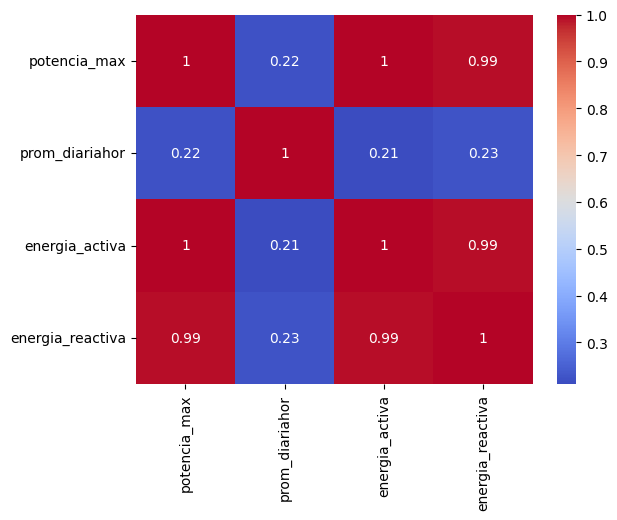

In [ ]:
correlacion1 = df1_2[['potencia_max',	'prom_diariahor',	'energia_activa', 	'energia_reactiva']].corr()

sns.heatmap(correlacion1, annot=True, cmap='coolwarm')

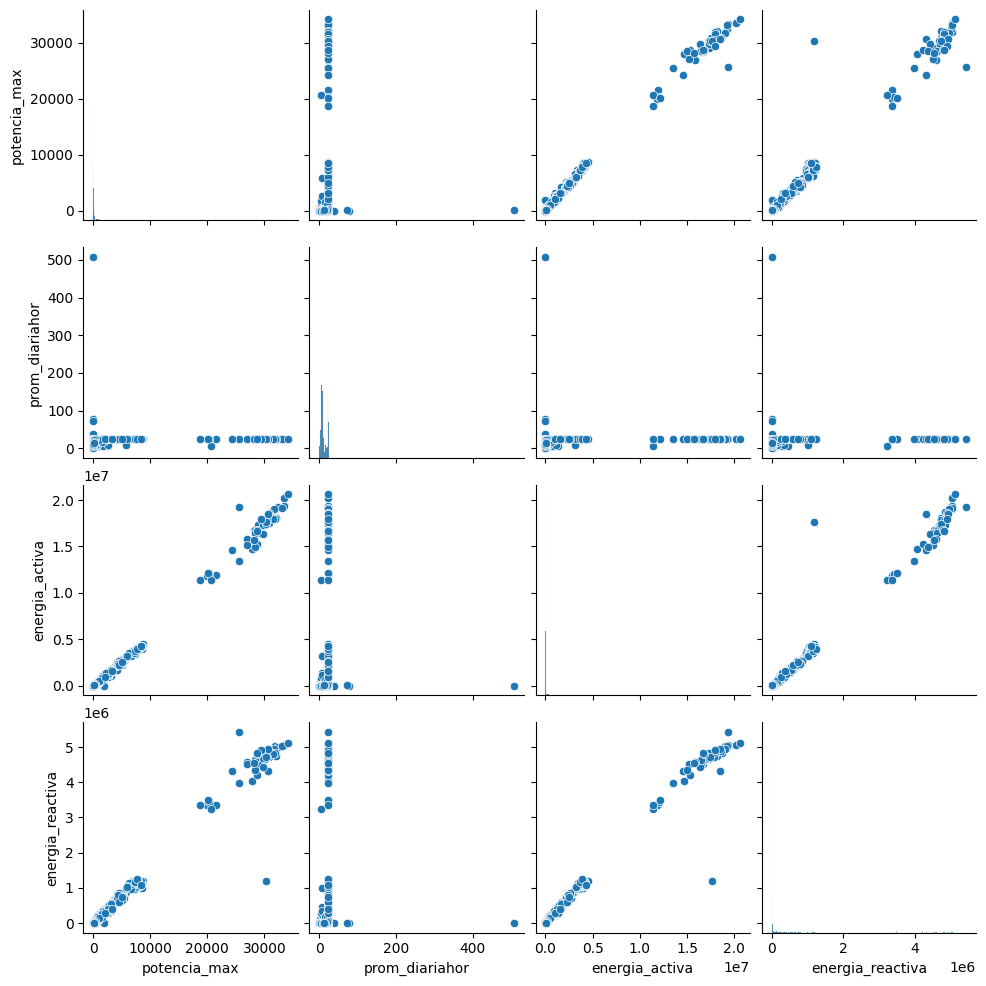

In [ ]:
sns.pairplot(df1_2[['potencia_max',	'prom_diariahor',	'energia_activa', 	'energia_reactiva']])

<Axes: ylabel='prom_diariahor'>

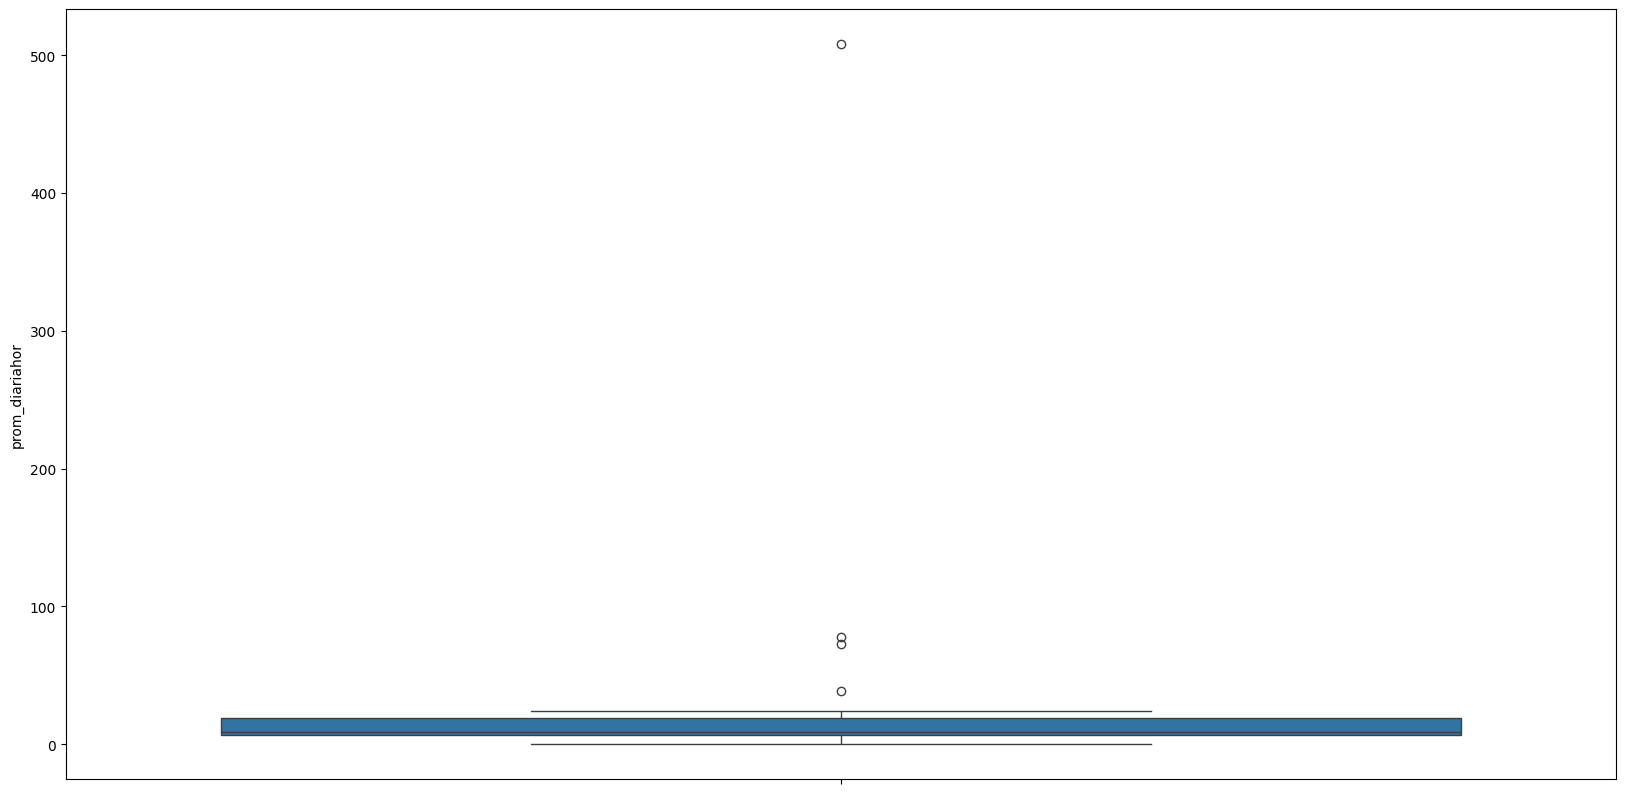

In [ ]:
plt.figure(figsize=(20, 10))
g = df1_2['prom_diariahor']
sns.boxplot(g)

<Axes: >

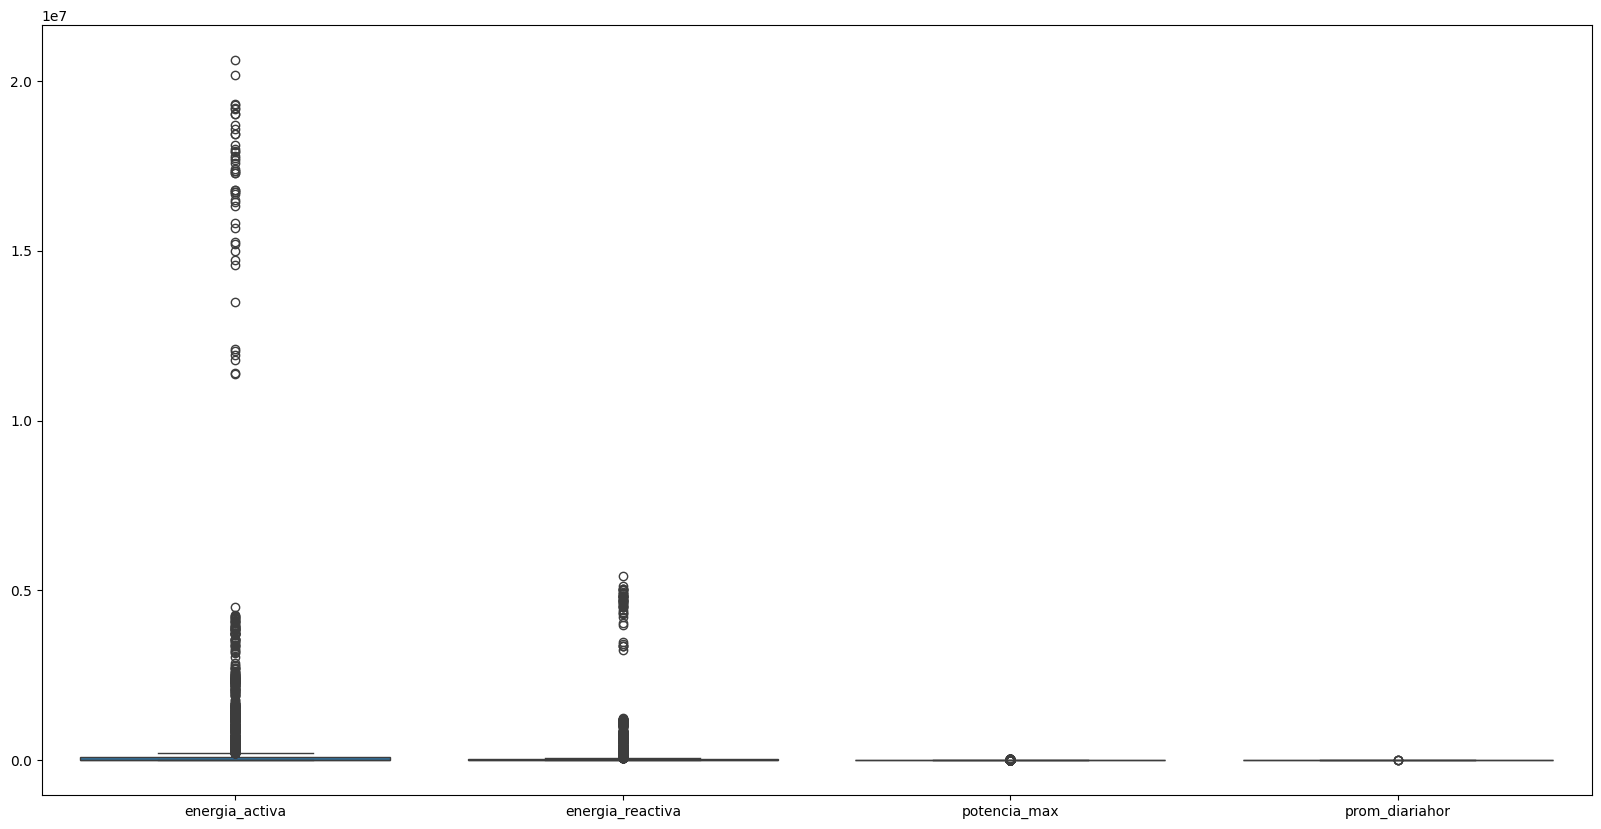

In [ ]:
plt.figure(figsize=(20, 10))
y = df1_2['dia_demanda_maxima']
z = df1_2['energia_activa']
u = df1_2['energia_reactiva']
f = df1_2['potencia_max']
g = df1_2['prom_diariahor']
w = y, z, u, f, g
sns.boxplot(w)

(array([696., 657.,   0., 582.,   0., 723., 537.,   0., 691., 386.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

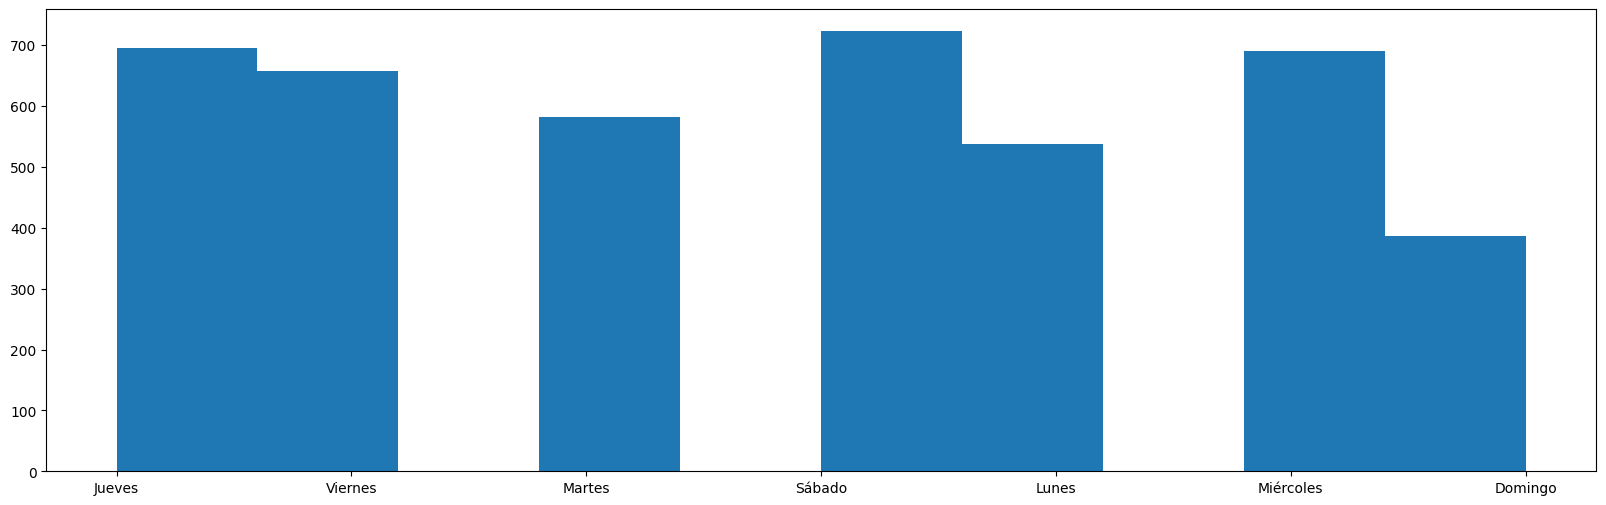

In [ ]:
plt.figure(figsize=(20, 6))
plt.hist(df1_2['dia_demanda_maxima'])

<ipython-input-26-faadf2e954c1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_2['prom_diariahor'])


<Axes: xlabel='prom_diariahor', ylabel='Density'>

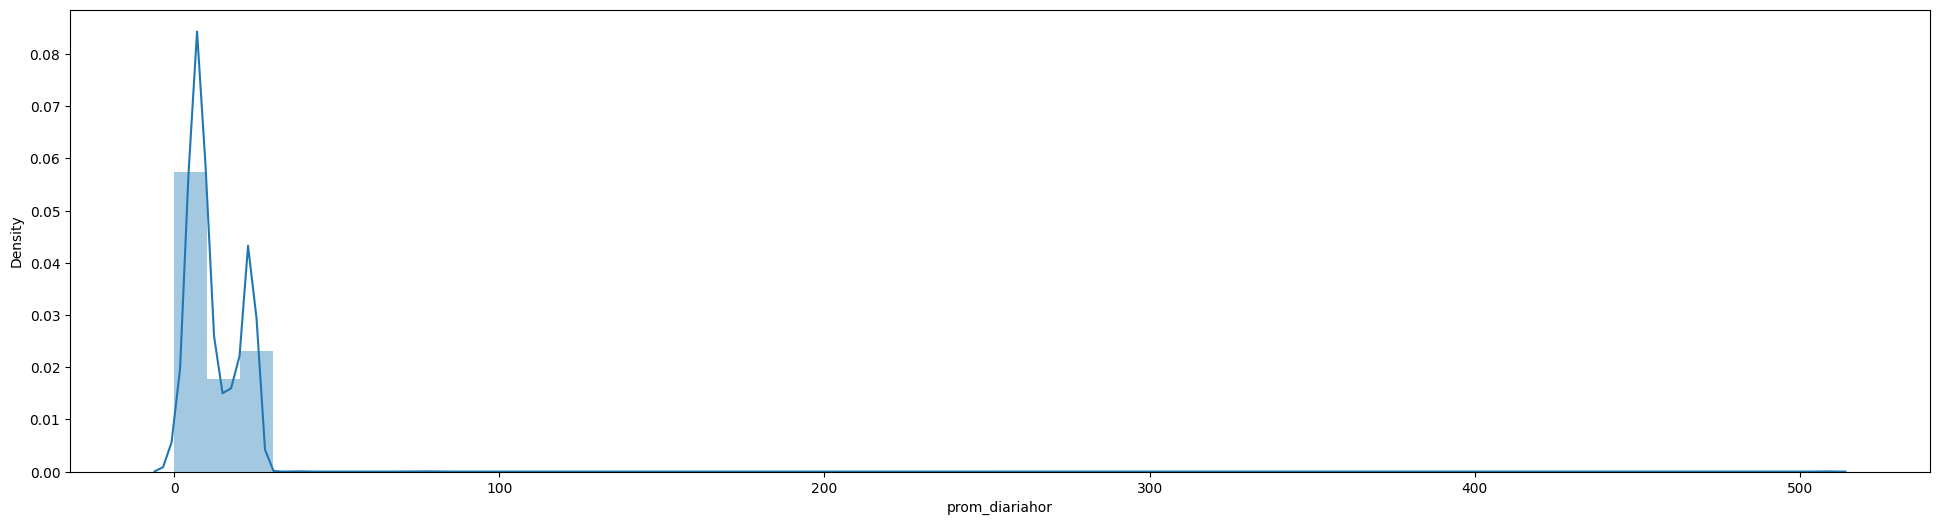

In [ ]:
plt.figure(figsize=(24, 6))
sns.distplot(df1_2['prom_diariahor'])

<ipython-input-62-9bdb24f0cf65>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  eje_x.set_xticklabels(eje_x.get_xticklabels(), rotation=90)


[Text(0, 0, 'Jueves'),
 Text(1, 0, 'Viernes'),
 Text(2, 0, 'Martes'),
 Text(3, 0, 'Sábado'),
 Text(4, 0, 'Lunes'),
 Text(5, 0, 'Miércoles'),
 Text(6, 0, 'Domingo')]

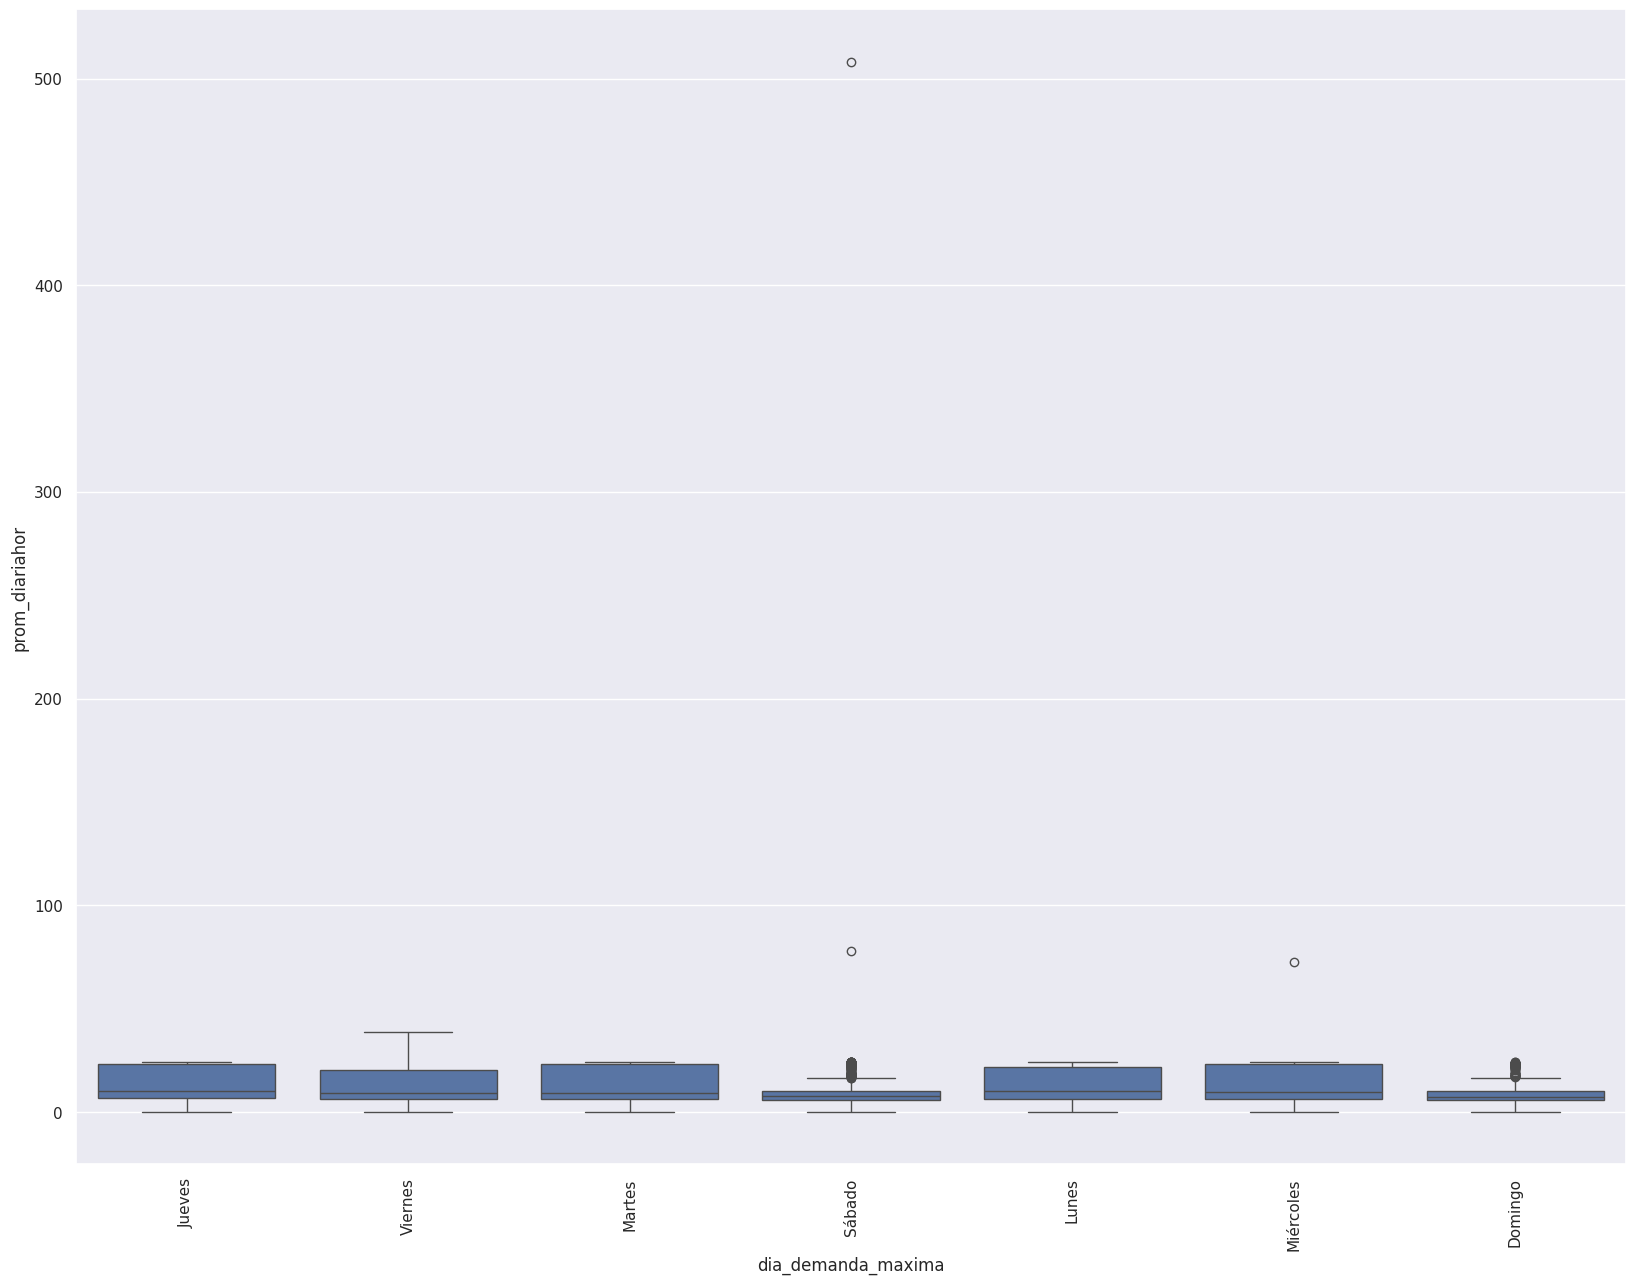

In [ ]:

sns.set(rc={'figure.figsize':(20,15)})

eje_x = sns.boxplot(x='dia_demanda_maxima', y='prom_diariahor', data=df1_2)

eje_x.set_xticklabels(eje_x.get_xticklabels(), rotation=90)

([0], [Text(0, 0, 'dia_deamnda_maxima')])

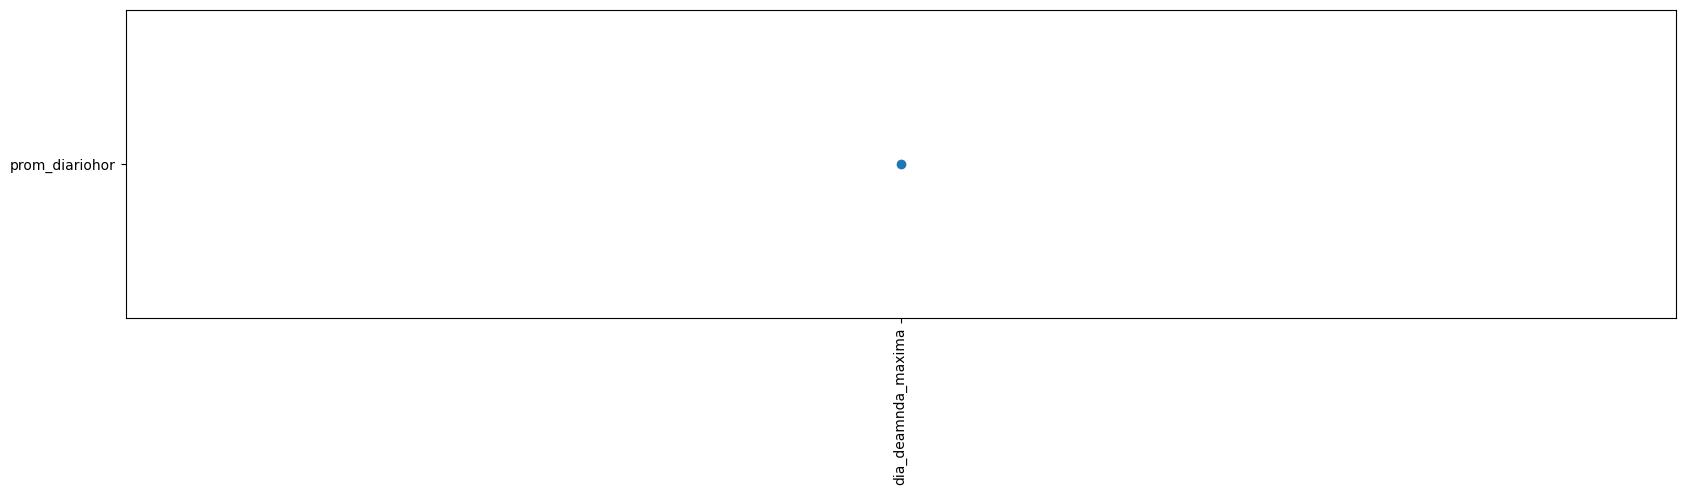

In [ ]:
plt.figure(figsize=(20, 4))
plt.scatter(x='dia_deamnda_maxima', y='prom_diariohor', data=df1_2)
plt.xticks(rotation=90)

## **Data df3**

In [ ]:
results3 = client.get("vy9n-w6hc", limit=3000)

datos3 = pd.DataFrame.from_records(results3)
datos3.head()

,proyecto,tipo,capacidad,departamento,municipio,codigo_departamento,codigo_municipio,fecha_estimada_fpo,energia_kwh_d_a,usuarios,inversi_n_estimada_cop,empleos_estimados,emisiones_co2_ton_a_o
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.8,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.0,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.0,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032


In [ ]:
datos3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   proyecto                158 non-null    object
 1   tipo                    158 non-null    object
 2   capacidad               158 non-null    object
 3   departamento            158 non-null    object
 4   municipio               158 non-null    object
 5   codigo_departamento     158 non-null    object
 6   codigo_municipio        158 non-null    object
 7   fecha_estimada_fpo      158 non-null    object
 8   energia_kwh_d_a         158 non-null    object
 9   usuarios                158 non-null    object
 10  inversi_n_estimada_cop  158 non-null    object
 11  empleos_estimados       158 non-null    object
 12  emisiones_co2_ton_a_o   158 non-null    object
dtypes: object(13)
memory usage: 16.2+ KB


In [ ]:
df3 = pd.DataFrame(
    {'Tipo': datos3['tipo'],
     'Empleos_estimado': datos3['empleos_estimados'],
     'Usuarios': datos3['usuarios'],
     'inversion': datos3['inversi_n_estimada_cop'],
     'Capacidad_proyectoEN': datos3['capacidad'],
     'Energíakw_diah': datos3['energia_kwh_d_a'],
     'Emisiones_proyecto': datos3['emisiones_co2_ton_a_o']

    }
)


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Tipo                  158 non-null    object
 1   Empleos_estimado      158 non-null    object
 2   Usuarios              158 non-null    object
 3   inversion             158 non-null    object
 4   Capacidad_proyectoEN  158 non-null    object
 5   Energíakw_diah        158 non-null    object
 6   Emisiones_proyecto    158 non-null    object
dtypes: object(7)
memory usage: 8.8+ KB


In [ ]:
### Posibles proyectos con solo df3.
##utilizando 'Empleos_estimado',	'Usuarios', 'inversion,	'Capacidad_instalada, 'Energía' predecir cual sería un incremento significativo de desempeño de un proyecto Eolico y/o Solar a futuro para continuar invertiendo en el.

In [ ]:
# Predecir

In [ ]:
# Revisar 'Capacidad_instalada' 'Energía' cual es costo y cual es produccion.
df3

,Tipo,Empleos_estimado,Usuarios,inversion,Capacidad_proyectoEN,Energíakw_diah,Emisiones_proyecto
0,Eólico,51,30665,79206000000,18.42,176832,51635
1,Solar,68,8157,42140000000,9.8,47040,13736
2,Solar,56,6709,34658000000,8.06,38688,11297
3,Solar,466,55769,288100000000,67.0,321600,93907
4,Solar,139,16647,86000000000,20.0,96000,28032
...,...,...,...,...,...,...,...
153,Solar,41,4944,22275000000,5.94,28512,8326
154,Solar,28,3296,14850000000,3.96,19008,5550
155,Solar,146,17480,78750000000,21.0,100800,29434
156,Solar,13,1582,8170000000,1.9,9120,2663


<Axes: >

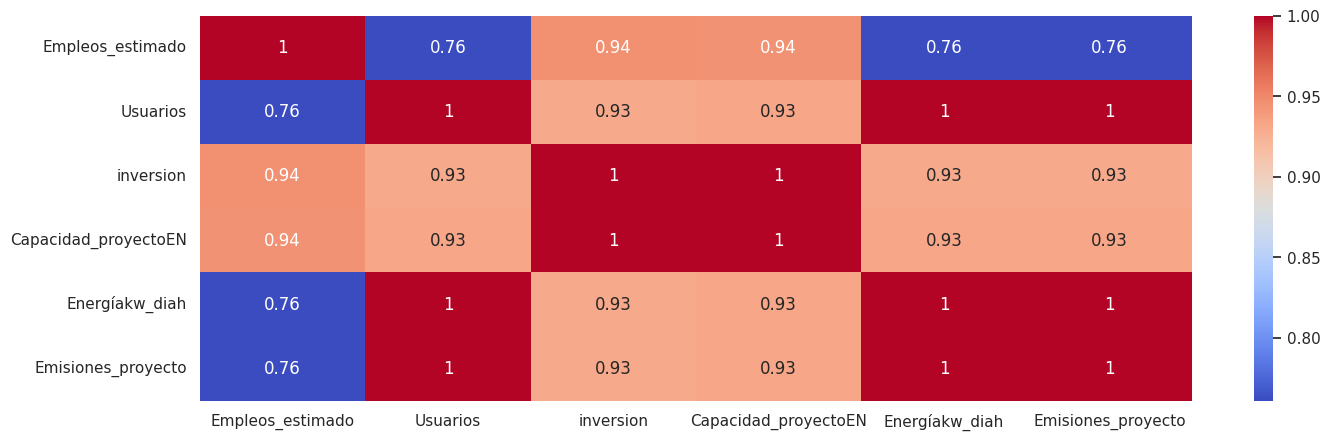

In [ ]:
sns.set(rc={'figure.figsize':(16,5)})
correlacion1 = df3[['Empleos_estimado',	'Usuarios',	'inversion', 	'Capacidad_proyectoEN', 'Energíakw_diah',	'Emisiones_proyecto']].corr()

sns.heatmap(correlacion1, annot=True, cmap='coolwarm')

In [ ]:
#sns.set(rc={'figure.figsize':(20,15)})

#eje_x = sns.boxplot(x='', y='', data=df1_2)

#eje_x.set_xticklabels(eje_x.get_xticklabels(), rotation=90)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
X = df3[['Empleos_estimado',	'Usuarios',	'inversion', 'Capacidad_proyectoEN','Energíakw_diah']]

In [ ]:
y = df3['Emisiones_proyecto']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
escaler = RobustScaler()
X_trainx_scaledo = escaler.fit_transform(X_train)
X_prueba_scaledo = escaler.transform(X_test)

In [ ]:
y_trainx_scaledo = escaler.fit_transform(y_train.values.reshape(-1, 1))
y_prueba_scaledo = escaler.transform(y_test.values.reshape(-1, 1))

In [ ]:
modelodf3 = LinearRegression()
modelodf3.fit(X_trainx_scaledo, y_trainx_scaledo)

LinearRegression()

In [ ]:
y_prediccion = modelodf3.predict(X_prueba_scaledo)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_prueba_scaledo, y_prediccion)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 6.92442933108139e-11


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_prueba_scaledo, y_prediccion)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 6.375745019701943e-06


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_prueba_scaledo, y_prediccion)
print(f"R² Score: {r2}")

R² Score: 0.9999999999972318


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelodf3, X, y, cv=5, scoring='neg_mean_squared_error')
mean_score = scores.mean()
print(f"Cross-Validation Mean MSE: {-mean_score}")

Cross-Validation Mean MSE: 0.06013362402365742


Text(0.5, 1.0, 'Valores Reales vs Predicciones')

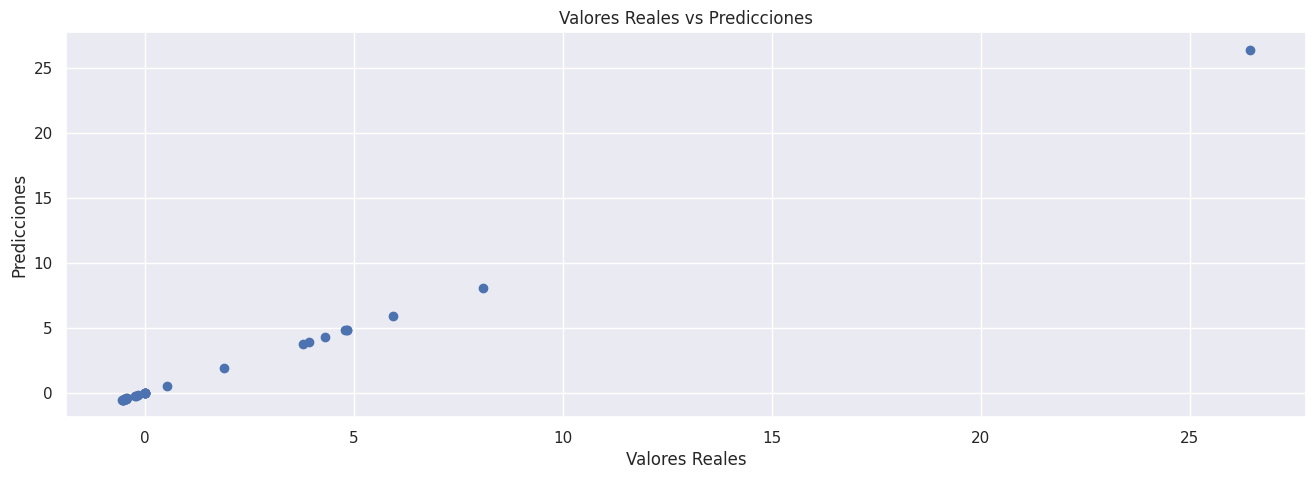

In [ ]:
plt.scatter(y_prueba_scaledo, y_prediccion)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")

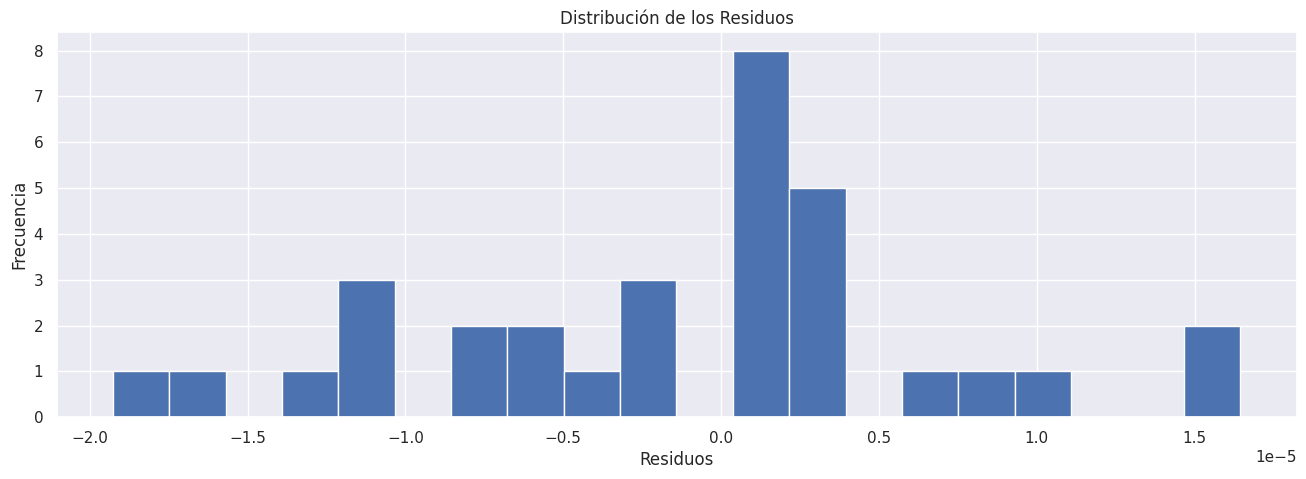

In [ ]:
residuos = y_prueba_scaledo - y_prediccion
plt.hist(residuos, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos")
plt.show()

## Modelo2df3

In [ ]:
X1 = df3[['Usuarios',	'inversion', 'Capacidad_proyectoEN','Energíakw_diah']]

In [ ]:
y1 = df3['Emisiones_proyecto']

In [ ]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
escaler = RobustScaler()
X_train_scal = escaler.fit_transform(X_train1)
X_test_scal = escaler.transform(X_test1)

In [ ]:
y_train_scal = escaler.fit_transform(y_train1.values.reshape(-1, 1))
y_test_scal = escaler.transform(y_test1.values.reshape(-1, 1))

In [ ]:
modelodf3 = LinearRegression()
modelodf3.fit(X_train_scal, y_train_scal)

LinearRegression()

In [ ]:
y_pred = modelodf3.predict(X_train_scal)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_scal, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

ValueError: Found input variables with inconsistent numbers of samples: [32, 126]

In [ ]:
df3['Tipo'].value_counts()


,count
Tipo,
Solar,145
Eólico,13


In [ ]:
#def tipo_energia(column):
  #if column == 'Solar':
    return 1
  #elif column == 'Eólico':
    return 0

IndentationError: unexpected indent (<ipython-input-1-0508f53f4dad>, line 3)

In [ ]:
#df3['Tipo'] = df3['Tipo'].apply(tipo_energia)
#df3

,Tipo,Empleos_estimado,Usuarios,inversion,Capacidad_instalada,Energía,Emisiones_proyecto
0,0,51,30665,79206000000,18.42,176832,51635
1,1,68,8157,42140000000,9.8,47040,13736
2,1,56,6709,34658000000,8.06,38688,11297
3,1,466,55769,288100000000,67.0,321600,93907
4,1,139,16647,86000000000,20.0,96000,28032
...,...,...,...,...,...,...,...
153,1,41,4944,22275000000,5.94,28512,8326
154,1,28,3296,14850000000,3.96,19008,5550
155,1,146,17480,78750000000,21.0,100800,29434
156,1,13,1582,8170000000,1.9,9120,2663


df3['Tipo'] = df3['Tipo'].apply(tipo_energia)
df3

In [ ]:
df3['Tipo'].value_counts()

,count
Tipo,
1,145
0,13


In [ ]:
for col in ['Empleos_estimado',	'Usuarios',	'inversion', 'Capacidad_instalada', 'Energía',	'Emisiones_proyecto']:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tipo                 158 non-null    int64  
 1   Empleos_estimado     158 non-null    int64  
 2   Usuarios             158 non-null    int64  
 3   inversion            158 non-null    int64  
 4   Capacidad_instalada  158 non-null    float64
 5   Energía              158 non-null    int64  
 6   Emisiones_proyecto   158 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 8.8 KB


In [ ]:
sns.set(rc={'figure.figsize':(10,15)})
sns.pairplot(df3[['Empleos_estimado',	'Usuarios',	'inversion', 'Capacidad_instalada', 'Energía',	'Emisiones_proyecto']])

NameError: name 'sns' is not defined

In [ ]:
datos3.columns

Index(['proyecto', 'tipo', 'capacidad', 'departamento', 'municipio',
       'codigo_departamento', 'codigo_municipio', 'fecha_estimada_fpo',
       'energia_kwh_d_a', 'usuarios', 'inversi_n_estimada_cop',
       'empleos_estimados', 'emisiones_co2_ton_a_o'],
      dtype='object')

In [ ]:
datos3.columns

## Datos **df4**

In [ ]:
results4 = client.get("sgfv-3yp8", limit=5000)

In [ ]:
datos4 = pd.DataFrame.from_records(results4)
datos4

In [ ]:
datos4.dtypes


In [ ]:
datos4.columns

In [ ]:
datos4.value_counts()

In [ ]:
df_4 = pd.DataFrame({'velocidad_viento': datos4['valorobservado'],
                     'latitud': datos4['latitud'],
                     'longitud': datos4['longitud'],
                     'municipio': datos4['municipio']
                     })
df_4



In [ ]:
eo = pd.to_numeric(df3[col], errors='coerce')
proyectos = 0
proyectos.sum()

In [ ]:
# @title velocidad_viento vs latitud

from matplotlib import pyplot as plt
df_4.plot(kind='scatter', x='velocidad_viento', y='latitud', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title velocidad_viento

from matplotlib import pyplot as plt
df_4['velocidad_viento'].plot(kind='line', figsize=(8, 4), title='velocidad_viento')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
correlacion1 = df_4[['velocidad_viento',	'latitud',	'longitud']].corr()

sns.heatmap(correlacion1, annot=True, cmap='coolwarm')

In [ ]:
for col in ['velocidad_viento',	'latitud', 'longitud']:
    df_4[col] = pd.to_numeric(df_4[col], errors='coerce')

In [ ]:
plt.figure(figsize=(30, 20))
plt.scatter(x='municipio', y='velocidad_viento', data=df_4)
plt.xticks(rotation=90)

In [ ]:
dt1 = pd.read_excel('Informe_septiembre_2024.xlsx')
dt1

In [ ]:
dt1.info()

In [ ]:
dt2 = pd.read_excel('Estado-de-proyectos-1er-y-2do-cuatrimestre-2024.xlsx')
dt2

In [ ]:
dt2.isnull().sum().sum()

In [ ]:
dt2.shape[0]*dt2.shape[1]

In [ ]:
#from matplotlib import pyplot as plt
#import seaborn as sns
#dt4.groupby('Unnamed: 1').size().plot(kind='barh', color=sns.palettes.#mpl_palette('Dark2'))
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dt1.columns

In [ ]:
dt2.columns

In [ ]:
dt2.info()

In [ ]:
dt2.shape[0]*dt2.shape[1]

In [ ]:
dt2.isnull().sum().sum()

In [ ]:
y = ((dt2.isnull().sum().sum())/(dt2.shape[0]*dt2.shape[1]))*100
y

In [ ]:
x = ((dt2.shape[0]*dt2.shape[1])/(dt2.isnull().sum().sum()))
x

In [ ]:
positv = dt2['ASIGNACIÓN DE RECURSOS'] == 'SI'
positv.sum()

In [ ]:
df_united = pd.merge(df1, df3, on='', how='left')
df_united

# Nueva sección

In [ ]:
import pandas as pd
dt3 = pd.read_csv('International Energy Agency - renewable electricity generation by source (non-combustible) in Colombia.csv')
dt3

In [ ]:
dt4 = pd.read_csv('https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/noDiasLLuvia.csv')
dt4
https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/noDiasLLuvia.csv'

In [ ]:
df_11 = pd.DataFrame({'col': ['A', 'b', 'C', 'B']})
df_11

In [ ]:
mapeo = {
    'A': 'X',
    'B': 'Y',
    'C': 'Z'}

In [ ]:
df_11['col'] = df_11['col'].replace(mapeo)

In [ ]:
df_11

In [ ]:
# Supongamos que 'data' es tu DataFrame original
data = pd.DataFrame({
    'col1': [1, 2, None, 4, 5],
    'col2': [None, 2, 3, None, 5]
})

In [ ]:
data

In [ ]:
data.info()

In [ ]:
datt = data.copy()

In [ ]:
datt.info()

In [ ]:
datt = datt.dropna()

In [ ]:
datt.info()